In [1]:
# Disable warnings in the notebook to maintain clean output cells
import warnings
warnings.filterwarnings('ignore')

# Import necessary libraries
import os
import shutil
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import yaml
from PIL import Image
from ultralytics import YOLO
from IPython.display import Video

In [2]:
# Load a pretrained YOLOv8n model from Ultralytics
import torch
torch.load('yolov8n.pt')
from ultralytics.nn.tasks import DetectionModel

model = YOLO('yolov8n.pt')


image 1/1 C:\Users\yangc\YOLO\sample_image.jpg: 384x640 5 cars, 38.4ms
Speed: 3.5ms preprocess, 38.4ms inference, 165.0ms postprocess per image at shape (1, 3, 384, 640)


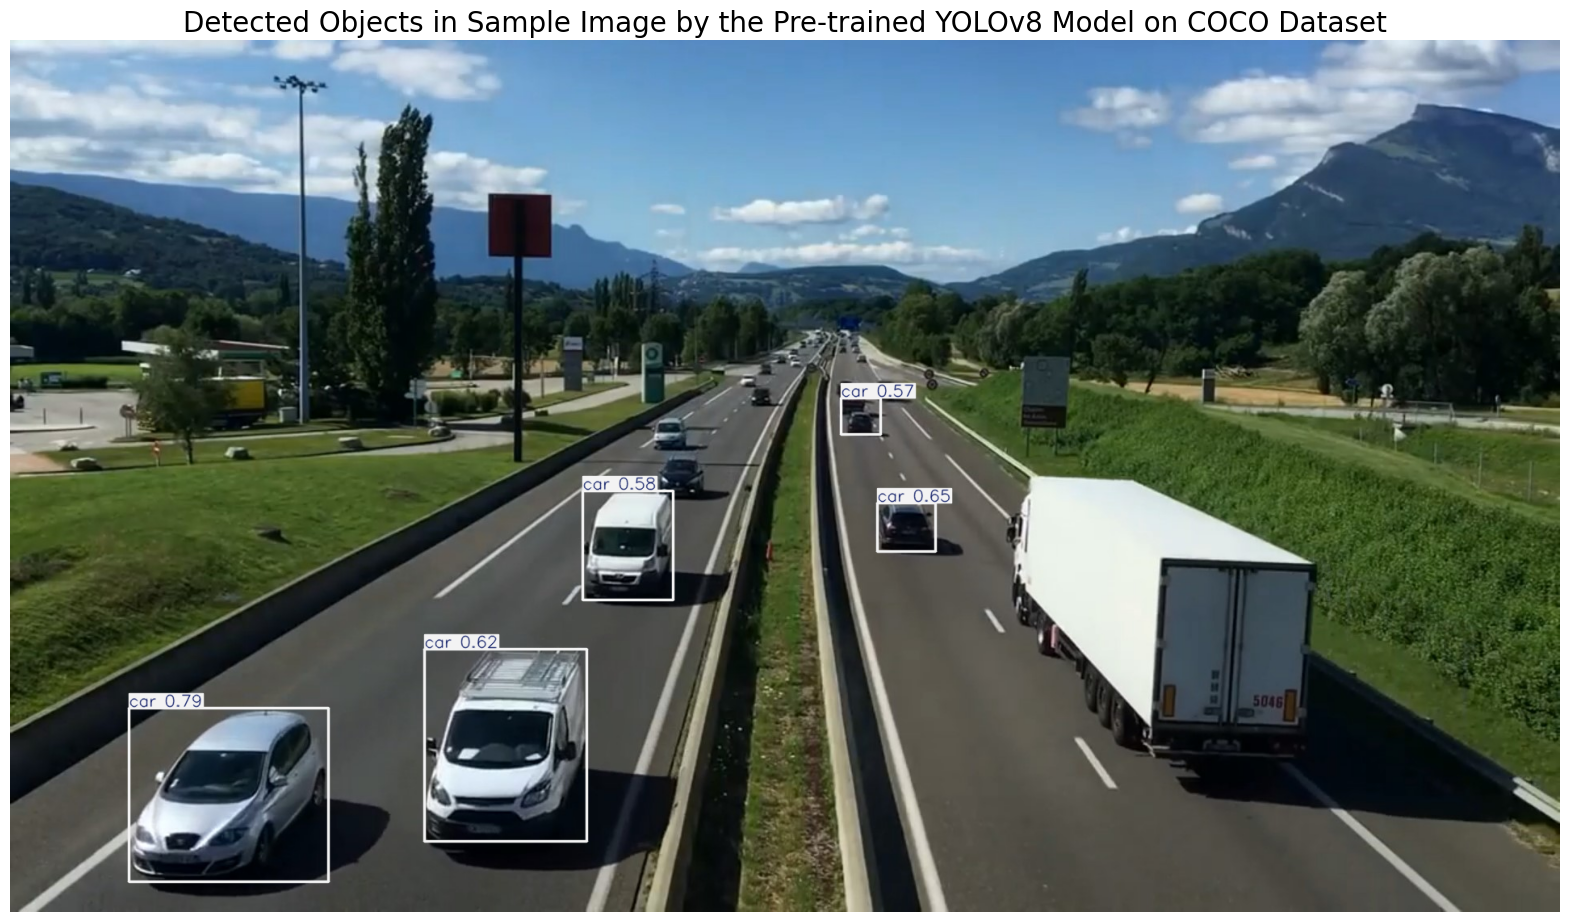

In [3]:
image_path = 'C:/Users/yangc/YOLO/sample_image.jpg'

# Perform inference on the provided image(s)
results = model.predict(source=image_path, 
                        imgsz=640,  # Resize image to 640x640 (the size pf images the model was trained on)
                        conf=0.5)   # Confidence threshold: 50% (only detections above 50% confidence will be considered)

# Annotate and convert image to numpy array
#使用plot方法在检测结果上绘制边界框和标签，并将结果转换为NumPy数组。line_width=2参数设置了绘制边界框的线宽
#results[0]是指读入的图片放在列表的第一个位置
sample_image = results[0].plot(line_width=2)

# Convert the color of the image from BGR to RGB for correct color representation in matplotlib
#OpenCV默认使用BGR颜色空间，而matplotlib使用RGB颜色空间。因此，为了在matplotlib中正确显示颜色，需要将图片从BGR转换为RGB。
sample_image = cv2.cvtColor(sample_image, cv2.COLOR_BGR2RGB)

# 创建一个新的matplotlib图形，设置图形的大小为20x15英寸。
plt.figure(figsize=(20,15))
plt.imshow(sample_image)
plt.title('Detected Objects in Sample Image by the Pre-trained YOLOv8 Model on COCO Dataset', fontsize=20)
#axis是坐标轴
plt.axis('off')
plt.show()

In [4]:
dataset_path = 'C:\\Users\\yangc\\YOLO\\Vehicle_Detection_Image_Dataset'

yaml_file_path = os.path.join(dataset_path, 'data.yaml')

In [5]:
# Set paths for training and validation image sets
#'C:\\Users\\yangc\\YOLO\\Vehicle_Detection_Image_Dataset\\train\\images'
train_images_path = os.path.join(dataset_path, 'train', 'images')
valid_images_path = os.path.join(dataset_path, 'valid', 'images')

# Initialize counters for the number of images
num_train_images = 0
num_valid_images = 0

# Initialize sets to hold the unique sizes of images
train_image_sizes = set()
valid_image_sizes = set()

# Check train images sizes and count
#下面这段代码是为了计数训练集和测试集中图片的数量以及判断他们的图片大小 是否一致的
for filename in os.listdir(train_images_path):
    if filename.endswith('.jpg'):  
        num_train_images += 1
        image_path = os.path.join(train_images_path, filename)
        with Image.open(image_path) as img:
            train_image_sizes.add(img.size)

# Check validation images sizes and count
for filename in os.listdir(valid_images_path):
    if filename.endswith('.jpg'): 
        num_valid_images += 1
        image_path = os.path.join(valid_images_path, filename)
        with Image.open(image_path) as img:
            valid_image_sizes.add(img.size)

# Print the results
print(f"Number of training images: {num_train_images}")
print(f"Number of validation images: {num_valid_images}")

# Check if all images in training set have the same size
if len(train_image_sizes) == 1:
    print(f"All training images have the same size: {train_image_sizes.pop()}")
else:
    print("Training images have varying sizes.")

# Check if all images in validation set have the same size
if len(valid_image_sizes) == 1:
    print(f"All validation images have the same size: {valid_image_sizes.pop()}")
else:
    print("Validation images have varying sizes.")

Number of training images: 536
Number of validation images: 90
All training images have the same size: (640, 640)
All validation images have the same size: (640, 640)


In [6]:
# Train the model on our custom dataset
results = model.train(
    data=yaml_file_path,     # Path to the dataset configuration file
    epochs=100,              # Number of epochs to train for
    imgsz=640,               # Size of input images as integer
    device=0,                # Device to run on, i.e. cuda device=0 
    patience=50,             # Epochs to wait for no observable improvement for early stopping of training
    batch=32,                # 较大的batch size可以提高内存利用率和训练速度，但也可能导致模型训练的不稳定。较小的batch size可能使训练更稳定，但速度较慢。
    optimizer='auto',        # 
    lr0=0.0001,              # Initial learning rate 初始学习率，控制模型权重更新的步长。
    lrf=0.1,                 # Final learning rate (lr0 * lrf)最终学习率，通常与初始学习率相乘以实现学习率衰减。
    dropout=0.1,             # dropout比率，用于正则化以减少过拟合。
    seed=0                   # Random seed for reproducibility
)

New https://pypi.org/project/ultralytics/8.3.97 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.88  Python-3.10.16 torch-2.6.0+cu118 CUDA:0 (NVIDIA GeForce RTX 4050 Laptop GPU, 6140MiB)
engine\trainer: task=detect, mode=train, model=yolov8n.pt, data=C:\Users\yangc\YOLO\Vehicle_Detection_Image_Dataset\data.yaml, epochs=100, time=None, patience=50, batch=32, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.1, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, r

100%|██████████| 5.35M/5.35M [00:00<00:00, 10.3MB/s]


AMP: checks passed 


train: Scanning C:\Users\yangc\YOLO\Vehicle_Detection_Image_Dataset\train\labels.cache... 536 images, 0 backgrounds, 0 corrupt: 100%|██████████| 536/536 [00:00<?, ?it/s]
val: Scanning C:\Users\yangc\YOLO\Vehicle_Detection_Image_Dataset\valid\labels.cache... 90 images, 0 backgrounds, 0 corrupt: 100%|██████████| 90/90 [00:00<?, ?it/s]


Plotting labels to C:\Users\yangc\runs\detect\train\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.0001' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to C:\Users\yangc\runs\detect\train
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      4.76G      2.413       2.96      1.836        268        640: 100%|██████████| 17/17 [00:07<00:00,  2.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.48it/s]

                   all         90        937    0.00374      0.108    0.00257   0.000795



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      5.07G       1.54      1.357       1.21        407        640: 100%|██████████| 17/17 [00:04<00:00,  3.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.84it/s]

                   all         90        937    0.00544      0.157     0.0133     0.0074



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      5.09G      1.315     0.9954      1.076        376        640: 100%|██████████| 17/17 [00:04<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.37it/s]

                   all         90        937       0.79      0.427       0.52      0.306



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      5.11G       1.23     0.8912      1.032        288        640: 100%|██████████| 17/17 [00:04<00:00,  3.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.33it/s]

                   all         90        937      0.835       0.82       0.88      0.563



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      5.12G      1.191     0.8357      1.019        311        640: 100%|██████████| 17/17 [00:04<00:00,  3.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.02it/s]

                   all         90        937      0.863      0.823      0.908      0.598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      5.14G       1.17     0.7954      1.013        479        640: 100%|██████████| 17/17 [00:04<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.46it/s]

                   all         90        937      0.868       0.89      0.938      0.647



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      5.46G      1.146     0.7701      1.003        342        640: 100%|██████████| 17/17 [00:04<00:00,  3.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.48it/s]

                   all         90        937      0.874      0.898      0.952      0.642



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      4.67G      1.122     0.7501     0.9929        355        640: 100%|██████████| 17/17 [00:04<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.29it/s]

                   all         90        937      0.851      0.917      0.941      0.639



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100       5.3G      1.114     0.7045     0.9878        451        640: 100%|██████████| 17/17 [00:04<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.10it/s]

                   all         90        937      0.829      0.894      0.917      0.632



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100       5.3G      1.096     0.6875      0.984        367        640: 100%|██████████| 17/17 [00:04<00:00,  3.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.92it/s]

                   all         90        937      0.865      0.923      0.957      0.677



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      5.31G      1.074     0.6796     0.9809        332        640: 100%|██████████| 17/17 [00:04<00:00,  3.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.88it/s]

                   all         90        937       0.82      0.925      0.937      0.639



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      5.33G      1.077     0.6758     0.9735        374        640: 100%|██████████| 17/17 [00:04<00:00,  3.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.47it/s]

                   all         90        937      0.865       0.92      0.933      0.641



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      5.35G      1.075     0.6637     0.9789        413        640: 100%|██████████| 17/17 [00:04<00:00,  3.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.93it/s]

                   all         90        937      0.882      0.921      0.962      0.671



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      5.36G      1.054     0.6473     0.9683        551        640: 100%|██████████| 17/17 [00:04<00:00,  3.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.62it/s]

                   all         90        937      0.887      0.916      0.958      0.691



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      5.38G      1.062     0.6248     0.9672        307        640: 100%|██████████| 17/17 [00:04<00:00,  3.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.50it/s]

                   all         90        937       0.89      0.918      0.952      0.684



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100       5.4G      1.055     0.6242     0.9694        353        640: 100%|██████████| 17/17 [00:04<00:00,  3.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.92it/s]

                   all         90        937      0.881      0.905      0.951      0.676



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      4.63G      1.034     0.6186      0.961        368        640: 100%|██████████| 17/17 [00:04<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.51it/s]

                   all         90        937       0.92      0.894      0.964       0.69



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      4.63G      1.028     0.6063     0.9551        358        640: 100%|██████████| 17/17 [00:04<00:00,  3.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.53it/s]

                   all         90        937      0.839      0.937      0.942      0.667



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      4.63G      1.026     0.6081     0.9592        402        640: 100%|██████████| 17/17 [00:04<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.57it/s]

                   all         90        937       0.88      0.934      0.957      0.677



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      4.63G      1.013     0.5943     0.9542        304        640: 100%|██████████| 17/17 [00:04<00:00,  3.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.85it/s]

                   all         90        937       0.91      0.922      0.972      0.699



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      4.63G      1.013     0.5677     0.9473        349        640: 100%|██████████| 17/17 [00:04<00:00,  3.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.54it/s]

                   all         90        937      0.866      0.936       0.96      0.695



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      4.63G      1.017     0.5857     0.9547        364        640: 100%|██████████| 17/17 [00:04<00:00,  3.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.79it/s]

                   all         90        937      0.906      0.909      0.967      0.702



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      4.99G      1.004     0.5842      0.946        320        640: 100%|██████████| 17/17 [00:04<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.44it/s]

                   all         90        937      0.871      0.927      0.957      0.676



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      5.01G     0.9905      0.575     0.9477        270        640: 100%|██████████| 17/17 [00:04<00:00,  3.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.70it/s]

                   all         90        937      0.889      0.911      0.963      0.698



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      5.03G      1.002     0.5641     0.9447        418        640: 100%|██████████| 17/17 [00:04<00:00,  3.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.01it/s]

                   all         90        937      0.926      0.905      0.972      0.711



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      5.04G     0.9774     0.5573     0.9448        237        640: 100%|██████████| 17/17 [00:04<00:00,  3.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.06it/s]

                   all         90        937      0.926      0.914      0.975       0.72



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      5.04G     0.9878     0.5534     0.9459        377        640: 100%|██████████| 17/17 [00:04<00:00,  3.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.60it/s]

                   all         90        937      0.907      0.927      0.971      0.695



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      5.04G      0.991     0.5512     0.9481        367        640: 100%|██████████| 17/17 [00:04<00:00,  3.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.08it/s]

                   all         90        937      0.909       0.93      0.966      0.705



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      5.04G     0.9842     0.5473     0.9441        238        640: 100%|██████████| 17/17 [00:04<00:00,  3.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.94it/s]

                   all         90        937      0.877      0.912      0.956      0.704



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      5.04G      0.981     0.5501     0.9454        313        640: 100%|██████████| 17/17 [00:04<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.63it/s]

                   all         90        937      0.902       0.93      0.971      0.701

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     31/100      5.04G     0.9844     0.5419      0.941        258        640: 100%|██████████| 17/17 [00:04<00:00,  3.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.70it/s]

                   all         90        937      0.905      0.931      0.971      0.713



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      5.04G     0.9595     0.5358     0.9394        318        640: 100%|██████████| 17/17 [00:04<00:00,  3.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.74it/s]

                   all         90        937      0.911       0.92       0.97      0.711



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      5.04G       0.97     0.5362     0.9349        244        640: 100%|██████████| 17/17 [00:04<00:00,  3.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.87it/s]

                   all         90        937      0.908      0.924      0.972      0.722



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      5.04G     0.9717     0.5473     0.9443        487        640: 100%|██████████| 17/17 [00:04<00:00,  3.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.64it/s]

                   all         90        937      0.907      0.908      0.962      0.703



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      5.06G     0.9687     0.5323     0.9448        249        640: 100%|██████████| 17/17 [00:04<00:00,  3.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.57it/s]

                   all         90        937      0.909      0.919      0.969      0.703



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      5.08G     0.9582     0.5275     0.9325        470        640: 100%|██████████| 17/17 [00:04<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.57it/s]

                   all         90        937      0.908      0.922      0.971      0.704



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      5.08G     0.9627     0.5315     0.9386        301        640: 100%|██████████| 17/17 [00:04<00:00,  3.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.83it/s]

                   all         90        937      0.904       0.94       0.97      0.725



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      5.08G     0.9595     0.5207     0.9385        298        640: 100%|██████████| 17/17 [00:04<00:00,  3.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.86it/s]

                   all         90        937      0.916      0.923      0.973      0.724



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      5.08G      0.943     0.5061     0.9368        308        640: 100%|██████████| 17/17 [00:04<00:00,  3.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.60it/s]

                   all         90        937      0.915      0.929      0.972      0.706



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      5.08G     0.9451     0.5046     0.9266        465        640: 100%|██████████| 17/17 [00:04<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.63it/s]

                   all         90        937      0.913      0.923      0.966      0.711



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      5.08G     0.9442      0.518     0.9291        355        640: 100%|██████████| 17/17 [00:04<00:00,  3.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.67it/s]

                   all         90        937      0.886      0.943       0.97      0.709



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      5.48G     0.9399     0.5368     0.9293        283        640: 100%|██████████| 17/17 [00:04<00:00,  3.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.47it/s]

                   all         90        937      0.907      0.916      0.971      0.723



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      4.58G     0.9341     0.5148     0.9281        286        640: 100%|██████████| 17/17 [00:04<00:00,  3.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.24it/s]

                   all         90        937      0.912       0.93       0.97      0.717



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      4.87G     0.9341     0.5087      0.928        393        640: 100%|██████████| 17/17 [00:04<00:00,  3.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.77it/s]

                   all         90        937      0.897      0.923      0.967      0.702



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      4.87G     0.9353     0.5017     0.9232        268        640: 100%|██████████| 17/17 [00:04<00:00,  3.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.67it/s]

                   all         90        937      0.924      0.928      0.969      0.726



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      4.87G     0.9358     0.5173     0.9303        416        640: 100%|██████████| 17/17 [00:04<00:00,  3.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.45it/s]

                   all         90        937      0.922      0.924      0.972      0.727



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100       5.2G     0.9292     0.5033     0.9249        313        640: 100%|██████████| 17/17 [00:04<00:00,  3.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.72it/s]

                   all         90        937       0.91      0.922       0.97      0.723



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100       5.2G     0.9102     0.4917     0.9253        303        640: 100%|██████████| 17/17 [00:04<00:00,  3.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.84it/s]

                   all         90        937      0.896      0.947      0.974      0.726



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      5.22G     0.9118      0.494     0.9253        290        640: 100%|██████████| 17/17 [00:04<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.36it/s]

                   all         90        937      0.898      0.945      0.975       0.73



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      5.24G     0.9123     0.4924     0.9203        368        640: 100%|██████████| 17/17 [00:04<00:00,  3.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.31it/s]

                   all         90        937      0.923      0.922      0.976      0.728



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      5.25G     0.9218     0.4972     0.9235        329        640: 100%|██████████| 17/17 [00:04<00:00,  3.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.45it/s]

                   all         90        937        0.9      0.937      0.968      0.729



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      5.27G     0.9118     0.4898     0.9195        314        640: 100%|██████████| 17/17 [00:04<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.95it/s]

                   all         90        937      0.921      0.932      0.974       0.74



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      5.27G     0.9003     0.4939     0.9228        450        640: 100%|██████████| 17/17 [00:04<00:00,  3.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.07it/s]

                   all         90        937      0.873      0.941       0.96      0.706



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      5.27G     0.8937     0.4854     0.9171        360        640: 100%|██████████| 17/17 [00:04<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.49it/s]

                   all         90        937      0.914      0.937      0.974       0.73



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      5.27G     0.9033     0.4832     0.9183        263        640: 100%|██████████| 17/17 [00:04<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.89it/s]

                   all         90        937      0.912      0.916      0.969      0.728



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      5.27G     0.8992     0.4815     0.9176        375        640: 100%|██████████| 17/17 [00:04<00:00,  3.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.21it/s]

                   all         90        937       0.91       0.93      0.974      0.719



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      5.27G     0.8948       0.48     0.9212        381        640: 100%|██████████| 17/17 [00:04<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.59it/s]

                   all         90        937      0.909      0.938      0.966      0.737



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      5.27G      0.887     0.4793     0.9156        308        640: 100%|██████████| 17/17 [00:04<00:00,  3.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.88it/s]

                   all         90        937      0.917      0.936      0.965      0.728



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      5.27G     0.8874     0.4755       0.92        309        640: 100%|██████████| 17/17 [00:04<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.65it/s]

                   all         90        937       0.92      0.934      0.972      0.723



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      5.27G     0.8943     0.4727     0.9213        348        640: 100%|██████████| 17/17 [00:04<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.80it/s]

                   all         90        937      0.928      0.919      0.976      0.725



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      5.29G     0.8843     0.4673     0.9139        345        640: 100%|██████████| 17/17 [00:04<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.74it/s]

                   all         90        937      0.928      0.932      0.974      0.727



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100       5.3G     0.9064       0.48     0.9245        344        640: 100%|██████████| 17/17 [00:04<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.12it/s]

                   all         90        937      0.938      0.914      0.968      0.732



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100       5.3G     0.8978     0.4751     0.9189        366        640: 100%|██████████| 17/17 [00:04<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.54it/s]

                   all         90        937      0.917      0.914      0.968      0.723



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100       5.3G     0.8937     0.4784     0.9165        373        640: 100%|██████████| 17/17 [00:04<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.51it/s]

                   all         90        937      0.918      0.929      0.975       0.72



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100       5.3G     0.8805     0.4586     0.9116        372        640: 100%|██████████| 17/17 [00:04<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.72it/s]

                   all         90        937      0.896      0.948      0.971      0.731



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100       5.3G      0.877      0.464     0.9174        247        640: 100%|██████████| 17/17 [00:04<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.70it/s]

                   all         90        937      0.925      0.919      0.976      0.723



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100       5.3G     0.8832     0.4617     0.9171        337        640: 100%|██████████| 17/17 [00:04<00:00,  3.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.29it/s]

                   all         90        937      0.918      0.914      0.969       0.73



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100       5.3G     0.8773     0.4596     0.9165        330        640: 100%|██████████| 17/17 [00:04<00:00,  3.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.15it/s]

                   all         90        937      0.925      0.919      0.976      0.736



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100       5.3G     0.8734     0.4553     0.9094        327        640: 100%|██████████| 17/17 [00:04<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.12it/s]

                   all         90        937       0.91      0.923      0.966      0.731



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      5.69G      0.862     0.4551     0.9058        393        640: 100%|██████████| 17/17 [00:05<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.26it/s]

                   all         90        937      0.909      0.933      0.966      0.733



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      4.27G     0.8639     0.4551     0.9129        391        640: 100%|██████████| 17/17 [00:04<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.03it/s]

                   all         90        937      0.918      0.921      0.968      0.735



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      4.78G     0.8659     0.4582     0.9085        273        640: 100%|██████████| 17/17 [00:04<00:00,  3.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.41it/s]

                   all         90        937      0.899      0.942      0.971      0.723



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      4.78G     0.8652     0.4525     0.9089        296        640: 100%|██████████| 17/17 [00:05<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.25it/s]

                   all         90        937      0.918      0.936      0.968      0.739



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      5.13G     0.8617     0.4469     0.9088        360        640: 100%|██████████| 17/17 [00:04<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.20it/s]

                   all         90        937      0.921      0.925      0.971       0.74



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      5.13G     0.8511     0.4494     0.9077        456        640: 100%|██████████| 17/17 [00:04<00:00,  3.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.33it/s]

                   all         90        937      0.913      0.925      0.969      0.733



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      5.13G      0.853     0.4468     0.9023        328        640: 100%|██████████| 17/17 [00:04<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.38it/s]

                   all         90        937       0.92      0.927      0.975       0.74



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      5.13G     0.8589     0.4513     0.9088        329        640: 100%|██████████| 17/17 [00:04<00:00,  3.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.88it/s]

                   all         90        937      0.904      0.936      0.974      0.736



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      5.15G     0.8485     0.4416     0.9032        362        640: 100%|██████████| 17/17 [00:04<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.64it/s]

                   all         90        937      0.914      0.936      0.974      0.736



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      5.17G     0.8438     0.4456     0.9065        342        640: 100%|██████████| 17/17 [00:04<00:00,  3.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.34it/s]

                   all         90        937       0.92      0.927      0.969      0.734



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      5.18G     0.8583     0.4462     0.9076        356        640: 100%|██████████| 17/17 [00:04<00:00,  3.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.42it/s]

                   all         90        937      0.908      0.929      0.967      0.734



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      5.18G      0.842     0.4443     0.9033        393        640: 100%|██████████| 17/17 [00:04<00:00,  3.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.10it/s]

                   all         90        937      0.924      0.931      0.971      0.735



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      5.18G     0.8463     0.4349     0.9015        294        640: 100%|██████████| 17/17 [00:04<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.10it/s]

                   all         90        937      0.897      0.943      0.967      0.737



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      5.18G     0.8417     0.4362     0.9048        350        640: 100%|██████████| 17/17 [00:04<00:00,  3.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.76it/s]

                   all         90        937       0.92      0.925       0.97      0.732



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      5.18G      0.838     0.4386     0.9065        296        640: 100%|██████████| 17/17 [00:04<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.64it/s]

                   all         90        937      0.919       0.92      0.967      0.736



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      5.18G     0.8444     0.4377     0.9015        304        640: 100%|██████████| 17/17 [00:04<00:00,  3.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.51it/s]

                   all         90        937      0.903      0.936      0.972      0.737



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      5.18G     0.8334     0.4369     0.9001        391        640: 100%|██████████| 17/17 [00:04<00:00,  3.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.77it/s]

                   all         90        937      0.914      0.927      0.972       0.74



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      5.18G     0.8341     0.4291      0.908        274        640: 100%|██████████| 17/17 [00:04<00:00,  3.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.18it/s]

                   all         90        937      0.918      0.933      0.971      0.732



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      5.18G     0.8327     0.4339     0.9001        330        640: 100%|██████████| 17/17 [00:04<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.74it/s]

                   all         90        937      0.918      0.932      0.973      0.736



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      5.19G     0.8382     0.4411     0.8986        305        640: 100%|██████████| 17/17 [00:04<00:00,  3.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.22it/s]

                   all         90        937      0.907      0.937      0.972      0.739



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      5.19G     0.8261     0.4336     0.8989        339        640: 100%|██████████| 17/17 [00:04<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.45it/s]

                   all         90        937      0.935      0.905      0.971      0.733


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      5.19G     0.8051      0.414     0.8968        270        640: 100%|██████████| 17/17 [00:05<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.42it/s]

                   all         90        937      0.912      0.938      0.968      0.736



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      5.19G     0.7964     0.4029     0.8927        249        640: 100%|██████████| 17/17 [00:04<00:00,  3.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.52it/s]

                   all         90        937      0.909      0.933       0.97      0.734



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      5.19G     0.8035     0.4046     0.8972        212        640: 100%|██████████| 17/17 [00:04<00:00,  3.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.45it/s]

                   all         90        937      0.923      0.936      0.971      0.739



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      5.19G     0.7937     0.3989     0.8912        249        640: 100%|██████████| 17/17 [00:04<00:00,  3.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.17it/s]

                   all         90        937      0.932      0.917      0.969      0.733



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      5.19G      0.789     0.3957     0.8927        240        640: 100%|██████████| 17/17 [00:04<00:00,  3.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.85it/s]

                   all         90        937      0.929      0.919      0.971      0.738



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      5.19G       0.79     0.3909     0.8901        217        640: 100%|██████████| 17/17 [00:04<00:00,  3.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.74it/s]

                   all         90        937      0.924      0.926       0.97      0.734



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      5.19G     0.7882     0.3889     0.8934        183        640: 100%|██████████| 17/17 [00:04<00:00,  3.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.03it/s]

                   all         90        937      0.916      0.935       0.97      0.735



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100       5.2G     0.7849     0.3904     0.8909        176        640: 100%|██████████| 17/17 [00:04<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.73it/s]

                   all         90        937      0.922      0.924       0.97      0.734



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100       5.2G     0.7781     0.3886     0.8889        278        640: 100%|██████████| 17/17 [00:04<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.54it/s]

                   all         90        937       0.91      0.944      0.969      0.733



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100       5.2G     0.7799     0.3876     0.8919        303        640: 100%|██████████| 17/17 [00:04<00:00,  3.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.79it/s]

                   all         90        937      0.909      0.947       0.97      0.735



100 epochs completed in 0.164 hours.
Optimizer stripped from C:\Users\yangc\runs\detect\train\weights\last.pt, 6.3MB
Optimizer stripped from C:\Users\yangc\runs\detect\train\weights\best.pt, 6.3MB

Validating C:\Users\yangc\runs\detect\train\weights\best.pt...
Ultralytics 8.3.88  Python-3.10.16 torch-2.6.0+cu118 CUDA:0 (NVIDIA GeForce RTX 4050 Laptop GPU, 6140MiB)
Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.67it/s]


                   all         90        937      0.921      0.932      0.974       0.74
Speed: 0.2ms preprocess, 1.9ms inference, 0.0ms loss, 1.2ms postprocess per image
Results saved to C:\Users\yangc\runs\detect\train


In [7]:
# Define the path to the directory
post_training_files_path = 'C:/Users/yangc/YOLO/runs/detect/train'

# List the files in the directory
files_and_dirs = os.listdir(post_training_files_path)

In [8]:
# Define a function to plot learning curves for loss values
def plot_learning_curve(df, train_loss_col, val_loss_col, title):
    plt.figure(figsize=(12, 5))
    sns.lineplot(data=df, x='epoch', y=train_loss_col, label='Train Loss', color='#141140', linestyle='-', linewidth=2)
    sns.lineplot(data=df, x='epoch', y=val_loss_col, label='Validation Loss', color='orangered', linestyle='--', linewidth=2)
    plt.title(title)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

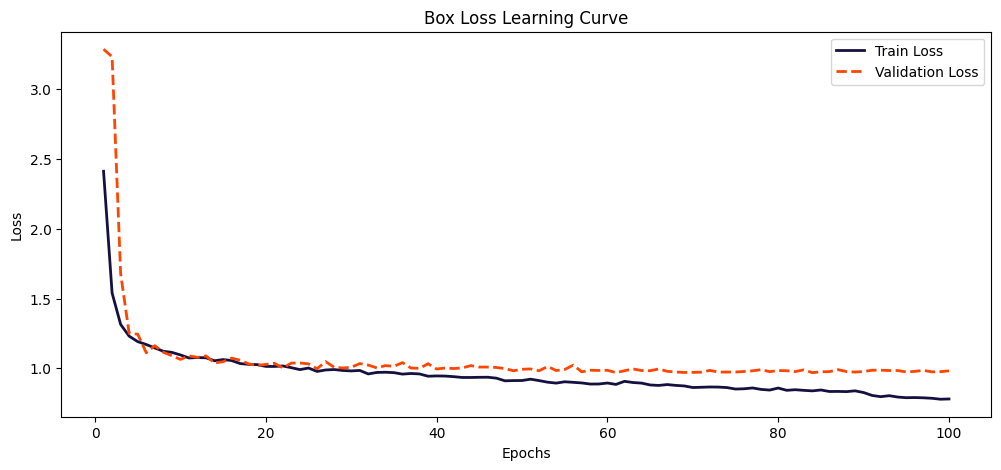

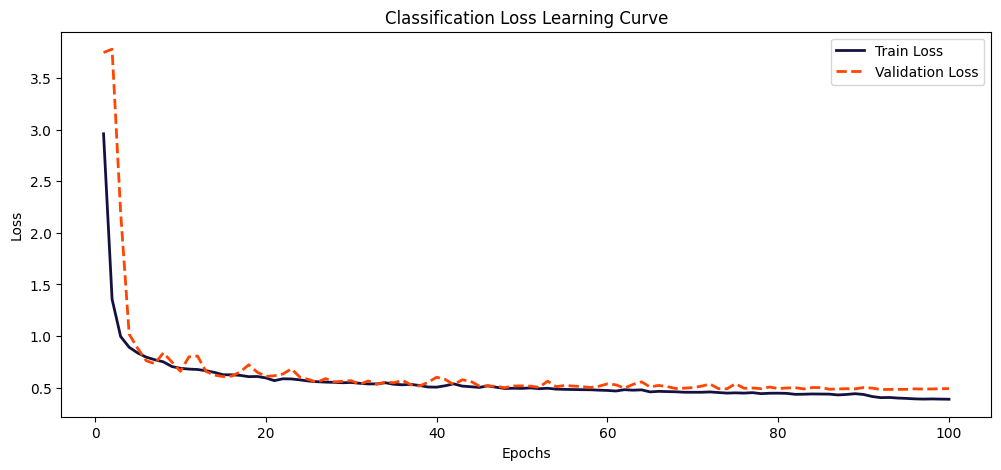

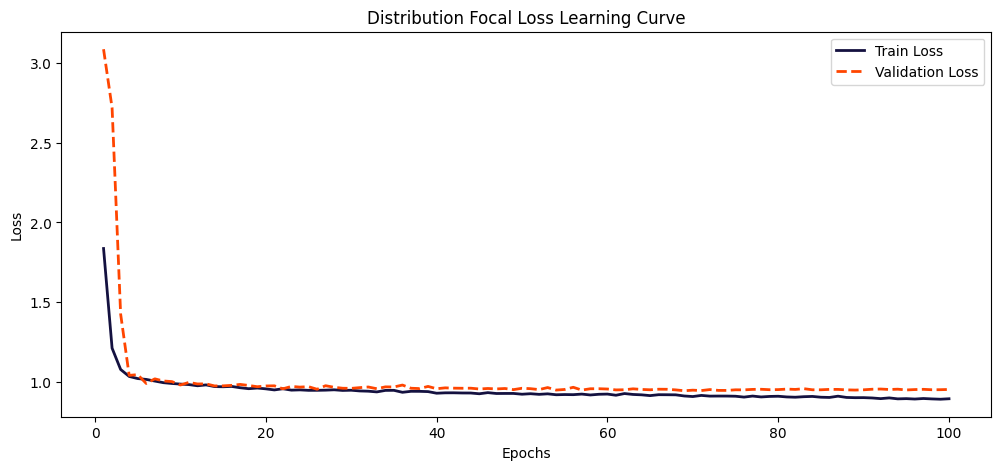

In [9]:
# Create the full file path for 'results.csv' using the directory path and file name
results_csv_path = os.path.join(post_training_files_path, 'results.csv')

# Load the CSV file from the constructed path into a pandas DataFrame
df = pd.read_csv(results_csv_path)

# Remove any leading whitespace from the column names
df.columns = df.columns.str.strip()

# Plot the learning curves for each loss
plot_learning_curve(df, 'train/box_loss', 'val/box_loss', 'Box Loss Learning Curve')
plot_learning_curve(df, 'train/cls_loss', 'val/cls_loss', 'Classification Loss Learning Curve')
plot_learning_curve(df, 'train/dfl_loss', 'val/dfl_loss', 'Distribution Focal Loss Learning Curve')


In [10]:
# Construct the path to the best model weights file using os.path.join
best_model_path = os.path.join(post_training_files_path, 'weights/best.pt')

# Load the best model weights into the YOLO model
best_model = YOLO(best_model_path)

# Validate the best model using the validation set with default parameters
metrics = best_model.val(split='val')


# P：精确度（Precision）
# R：召回率（Recall）
# mAP50：平均精度均值（mean Average Precision at IoU=0.5）
# mAP50-95：平均精度均值（mean Average Precision at IoU=0.5:0.95）


Ultralytics 8.3.88  Python-3.10.16 torch-2.6.0+cu118 CUDA:0 (NVIDIA GeForce RTX 4050 Laptop GPU, 6140MiB)
Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning C:\Users\yangc\YOLO\Vehicle_Detection_Image_Dataset\valid\labels.cache... 90 images, 0 backgrounds, 0 corrupt: 100%|██████████| 90/90 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:06<00:00,  1.03s/it]


                   all         90        937      0.922       0.93      0.974       0.74
Speed: 2.0ms preprocess, 6.6ms inference, 0.0ms loss, 5.1ms postprocess per image
Results saved to C:\Users\yangc\runs\detect\val


In [11]:
# Convert the dictionary to a pandas DataFrame and use the keys as the index
metrics_df = pd.DataFrame.from_dict(metrics.results_dict, orient='index', columns=['Metric Value'])

# Display the DataFrame
metrics_df.round(3)

,Metric Value
metrics/precision(B),0.922
metrics/recall(B),0.930
metrics/mAP50(B),0.974
metrics/mAP50-95(B),0.740
fitness,0.763



image 1/1 C:\Users\yangc\YOLO\sample_image.jpg: 384x640 5 Vehicles, 31.2ms
Speed: 3.4ms preprocess, 31.2ms inference, 4.4ms postprocess per image at shape (1, 3, 384, 640)


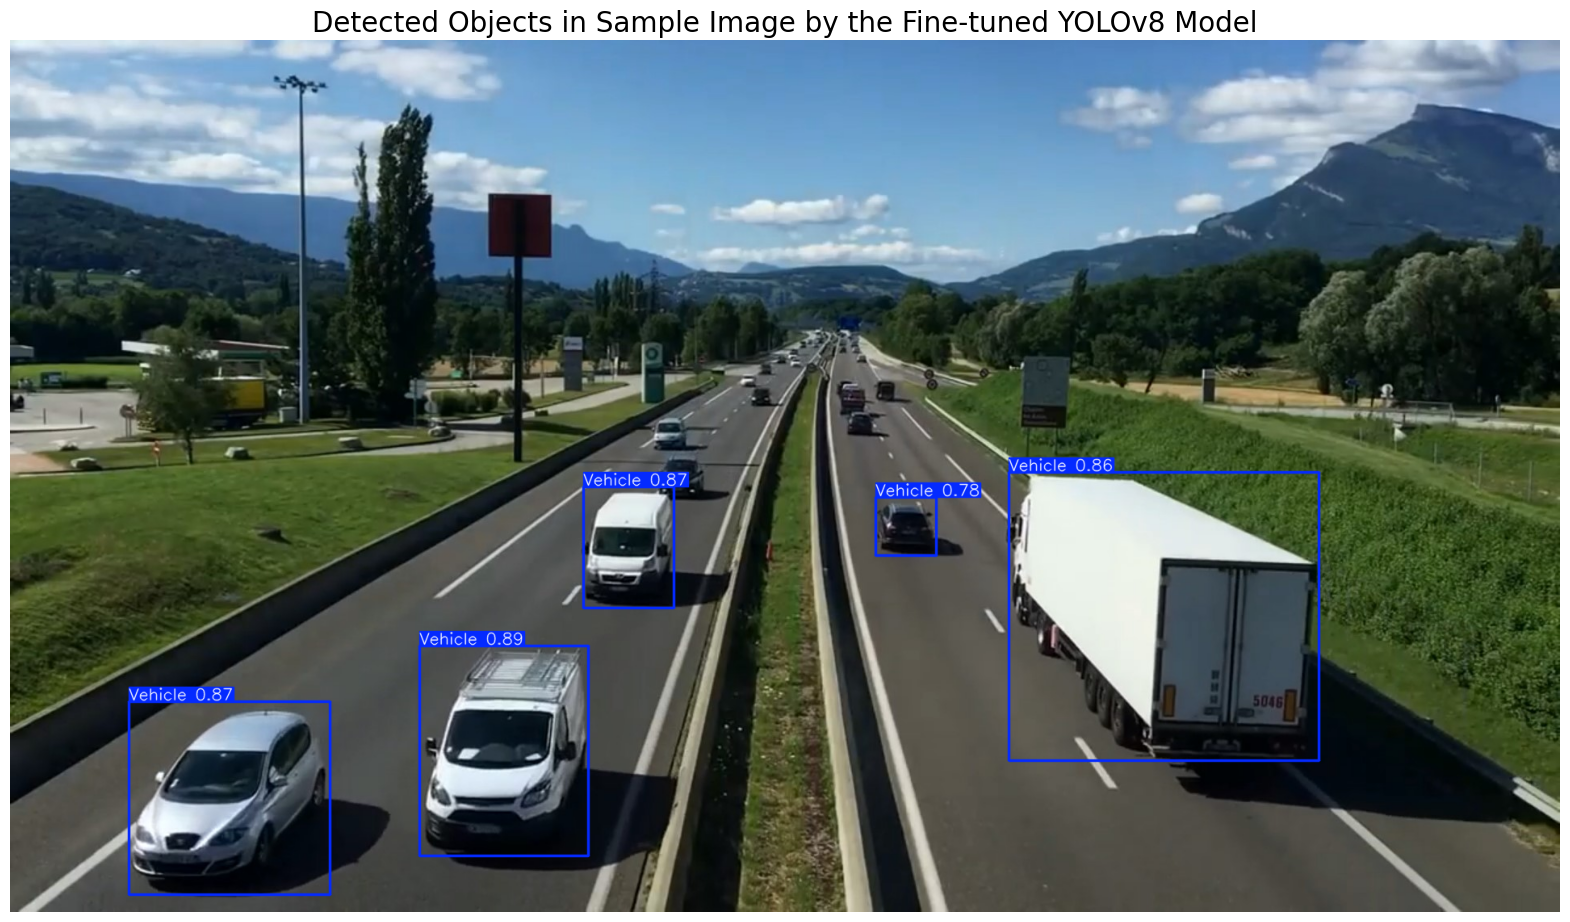

In [13]:


# Path to the image file
sample_image_path = 'C:/Users/yangc/YOLO/sample_image.jpg'

# Perform inference on the provided image using best model
results = best_model.predict(source=sample_image_path, imgsz=640, conf=0.7) 
                        
# Annotate and convert image to numpy array
sample_image = results[0].plot(line_width=2)

# Convert the color of the image from BGR to RGB for correct color representation in matplotlib
sample_image = cv2.cvtColor(sample_image, cv2.COLOR_BGR2RGB)

# Display annotated image
plt.figure(figsize=(20,15))
plt.imshow(sample_image)
plt.title('Detected Objects in Sample Image by the Fine-tuned YOLOv8 Model', fontsize=20)
plt.axis('off')
plt.show()



In [ ]:
import warnings
warnings.filterwarnings('ignore')

import os
import shutil
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import yaml
from PIL import Image
from ultralytics import YOLO
from IPython.display import Video
import ultralytics
import cv2
import pandas as pd
import time
from ultralytics import YOLO
from deep_sort_realtime.deepsort_tracker import DeepSort 
model =YOLO("C:/Users/yangc/YOLO/runs/detect/train/weights/best.pt")
# model=YOLO('yolov8s.pt')

class_list = ['Vehicle']

tracker = DeepSort(
    max_age=30,
    n_init=10,
    nms_max_overlap=1.0,
    max_cosine_distance=0.1,
    nn_budget=None,
    override_track_class=None,
    embedder="mobilenet",
    half=True,
    bgr=True,
    embedder_gpu=True,
    embedder_model_name=None,
    embedder_wts=None,
    polygon=False,
    today=None
)

cap=cv2.VideoCapture("C:/Users/yangc/YOLO/highway.mp4")

down = {}
up = {}
counter_down = []
counter_up = []

red_line_y = 198
blue_line_y = 268
offset = 6

# 创建保存帧的文件夹
if not os.path.exists('detected_frames'):
    os.makedirs('detected_frames')

fourcc = cv2.VideoWriter_fourcc(*'XVID')
out = cv2.VideoWriter('output.avi', fourcc, 20.0, (1020, 500))

while True:
    ret, frame = cap.read()
    if not ret:
        break
    
    frame = cv2.resize(frame, (1020, 500))
    
    # YOLO predict
    results = model.predict(frame,conf=0.5)
    a = results[0].boxes.data
    a = a.detach().cpu().numpy()
    px = pd.DataFrame(a).astype("float")
    
    # DeepSort
    detections = []
    for index, row in px.iterrows():
        x1, y1, x2, y2, conf, d = row.tolist()
        x1, y1, x2, y2 = map(int, [x1, y1, x2, y2])
        class_name = class_list[int(d)]
        
        if class_name == 'Vehicle':
            w = x2 - x1
            h = y2 - y1
            detections.append(([x1, y1, w, h], conf, class_name))
    
    tracks = tracker.update_tracks(detections, frame=frame)

    for track in tracks:
        if not track.is_confirmed():
            continue
            
        track_id = track.track_id
        bbox = track.to_tlbr() 
        
        x3, y3, x4, y4 = map(int, bbox)
        cx = (x3 + x4) // 2
        cy = (y3 + y4) // 2

        cv2.rectangle(frame, (x3, y3), (x4, y4), (0, 255, 0), 2)
        cv2.putText(frame, str(track_id), (x3, y3), cv2.FONT_HERSHEY_COMPLEX, 0.6, (255, 255, 255), 1)
        
        # down
        if red_line_y < (cy + offset) and red_line_y > (cy - offset):
            down[track_id] = time.time()
            
        if track_id in down:
            if blue_line_y < (cy + offset) and blue_line_y > (cy - offset):
                elapsed_time = time.time() - down[track_id]
                if track_id not in counter_down:
                    counter_down.append(track_id)
                    distance = 20  # meters
                    a_speed_ms = distance / elapsed_time
                    a_speed_kh = a_speed_ms * 3.6
                    # 绘制图形
                    cv2.circle(frame, (cx, cy), 4, (0, 0, 255), -1)
                    cv2.rectangle(frame, (x3, y3), (x4, y4), (0, 255, 0), 2)
                    cv2.putText(frame, f'{int(a_speed_kh)}Km/h', (x4, y4), cv2.FONT_HERSHEY_COMPLEX, 0.8, (0, 255, 255), 2)
        
        # up
        if blue_line_y < (cy + offset) and blue_line_y > (cy - offset):
            up[track_id] = time.time()
            
        if track_id in up:
            if red_line_y < (cy + offset) and red_line_y > (cy - offset):
                elapsed_time = time.time() - up[track_id]
                if track_id not in counter_up:
                    counter_up.append(track_id)
                    distance = 20  # meters
                    a_speed_ms = distance / elapsed_time
                    a_speed_kh = a_speed_ms * 3.6
                    # 绘制图形
                    cv2.circle(frame, (cx, cy), 4, (0, 0, 255), -1)
                    cv2.rectangle(frame, (x3, y3), (x4, y4), (0, 255, 0), 2)
                    cv2.putText(frame, f'{int(a_speed_kh)}Km/h', (x4, y4), cv2.FONT_HERSHEY_COMPLEX, 0.8, (0, 255, 255), 2)
    
    cv2.rectangle(frame, (0, 0), (250, 90), (0, 255, 255), -1)
    cv2.line(frame, (172, red_line_y), (774, red_line_y), (0, 0, 255), 2)
    cv2.line(frame, (8, blue_line_y), (927, blue_line_y), (255, 0, 0), 2)
    cv2.putText(frame, f'Going Down: {len(counter_down)}', (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 0, 0), 1)
    cv2.putText(frame, f'Going Up: {len(counter_up)}', (10, 60), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 0, 0), 1)
    
    cv2.imwrite(f'detected_frames/frame_{int(time.time()*1000)}.jpg', frame)
    out.write(frame)
    
    cv2.imshow("Traffic Monitoring", frame)
    if cv2.waitKey(1) == 27:
        break

cap.release()
out.release()
cv2.destroyAllWindows()